# Statistics for Data Science Project
#### Team Members
- Gokul Erla
- Samyuktha

## Dataset
  
> We are using a dataset called '**Adult**' from the UCI ML repository  [[Web link]](https://archive.ics.uci.edu/ml/datasets/Adult). It was extracted from the census bureau database of the government of USA.


>  It is a Multivariate dataset with **48,842** instances. It has **14** attributes which include categorical and integer data. The variables include  categorical variables, discrete numerical
variables, and continuous numerical variables.


> The attributes are:


1.   **age**: Continuous variable, gives the age of the individual

2.   **workclass**: Describes the job of the individual, categories include  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

3.   **fnlwgt**: *Final Weight* is controlled to independent estimates of the civillain non-institutional population of the US. This metric was created by Population Division at the Census Bureau. It is continuous.

4. **education**: Describes the academic accomplishments of individuals. Categories include Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th etc

5. **education-num**: encoding for education category, continuous data

6. **marital-status**: categories include Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7. **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Protective-serv, Armed-Forces etc.

8. **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10.**sex**: Female, Male

11. **capital-gain**: continuous data

12. **capital-loss**: continuous data

13. **hours-per-week**: Number of hours one has worked in a week.

14. **native-country**: United-States, Cambodia, England, Puerto-Rico, 
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan etc.














# Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/College/Year2/3rdSEM/StatisticsProject

/content/drive/My Drive/College/Year2/3rdSEM/StatisticsProject


In [ ]:
!ls

 adult.test.csv     'Statistics Project.gdoc'	      StatsProj.ipynb
 adult.test.gsheet  'Statistics Project Setup.gdoc'


# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
notFilteredData = pd.read_csv('adult.test.csv')

In [ ]:
notFilteredData

,Age,Work Class,Final wtg,Education,Edu No,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hrs/week,Native country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
fData = notFilteredData.drop(['Capital Loss'], axis=1)

In [ ]:
fData = fData.replace(to_replace = ' ?', value = None)

In [ ]:
fData = fData[fData['Capital Gain'] != 0]

In [ ]:
fData['Race'] = fData['White'].sample(n = 300)
fData['Asian-Pac-Islander'] = fData['Asian-Pac-Islander'].sample(n = 300)
fData['Black'] = fData['Black'].sample(n = 300)

KeyError: ignored

In [ ]:
fData.columns = fData.columns.str.strip()

In [ ]:
fData

,Age,Work Class,Final wtg,Education,Edu No,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Hrs/week,Native country,Income
5613,33,Private,255004,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,2354,61,United-States,<=50K.
8101,45,Self-emp-not-inc,40666,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,2885,60,United-States,<=50K.
8957,54,Federal-gov,72257,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,7688,40,United-States,>50K.
3446,64,Private,130727,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,2174,37,United-States,<=50K.
1240,41,Private,135056,Masters,14,Widowed,Prof-specialty,Not-in-family,White,Female,10520,38,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,26,Private,263444,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,14344,40,United-States,>50K.
9229,34,Private,255830,Assoc-acdm,12,Divorced,Craft-repair,Unmarried,Black,Female,7443,40,United-States,<=50K.
8165,65,Private,29276,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,2538,50,United-States,<=50K.
6072,44,Private,127482,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,7688,40,United-States,>50K.


*italicized text*### Computing mean and variance of each column

In [ ]:
stats = fData.describe().loc[['mean', 'std']]
stats.loc['variance'] = stats.loc['std']**2

In [ ]:
stats

,Age,Final wtg,Edu No,Capital Gain,Hrs/week
mean,43.746250,1.874201e+05,11.011250,1.259196e+04,43.980000
std,13.473912,1.068033e+05,2.730466,2.200170e+04,13.209190
variance,181.546294,1.140695e+10,7.455443,4.840747e+08,174.482703


## Normalization and Standardization

In [ ]:
stats['Age'].iloc[::] = stats['Age'].iloc[::].apply(lambda x: (x-stats['Age'].mean())/ stats['Age'].std())
stats['Final wtg'].iloc[::] = stats['Final wtg'].iloc[::].apply(lambda x: (x-stats['Final wtg'].mean())/ stats['Final wtg'].std())
stats['Edu No'].iloc[::] = stats['Edu No'].iloc[::].apply(lambda x: (x-stats['Edu No'].mean())/ stats['Edu No'].std())
stats['Capital Gain'].iloc[::] = stats['Capital Gain '].iloc[::].apply(lambda x: (x-stats['Capital Gain'].mean())/ stats['Capital Gain'].std())
stats['Hrs/week'].iloc[::] = stats['Hrs/week'].iloc[::].apply(lambda x: (x-stats['Hrs/week'].mean())/ stats['Hrs/week'].std())

NameError: ignored

**Box Plot** 

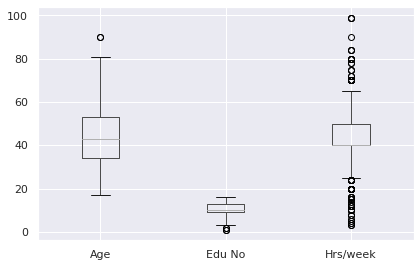

In [ ]:
boxplot = fData.boxplot(column=['Age', 'Edu No','Hrs/week'])
# 1 outlier for capital gain

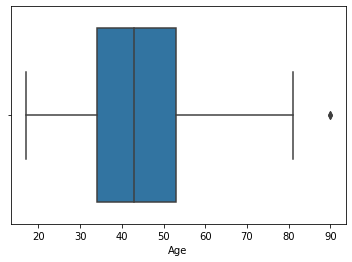

In [ ]:
sns.boxplot(x=fData['Age'])
# one outlier at age 90.

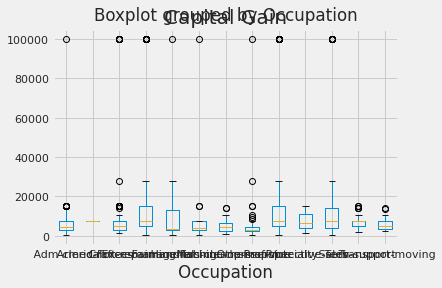

In [ ]:
plt.style.use('fivethirtyeight')
fData.boxplot(column='Capital Gain', by='Occupation')
# remove outlier with 1,000,000

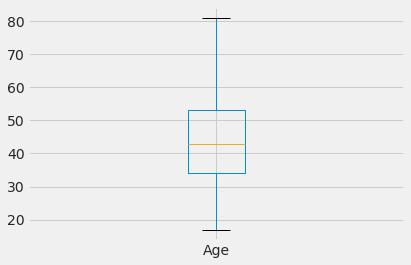

In [ ]:
fData.boxplot('Age', showfliers=False)

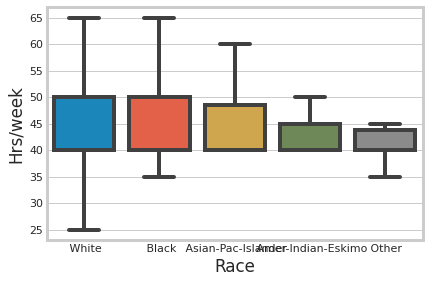

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Race', y = 'Hrs/week', data = fData, showfliers=False)

Bar Chart

Text(0.5, 1.0, 'Gender vs Income')

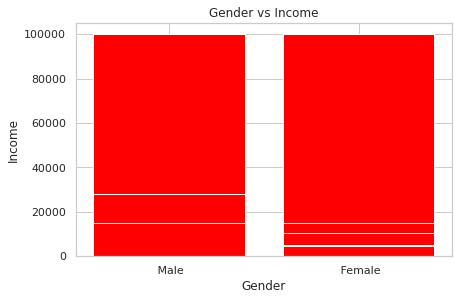

In [ ]:
plt.bar(x=fData['Sex'], height=fData['Capital Gain'] , color='red')
sns.set(font_scale=1.0)
plt.xlabel("Gender")
plt.ylabel("Capital Gain")
plt.title("Gender vs Capital Gain")

Histogram (In Progress)

In [ ]:
plt.style.use('fivethirtyeight')
bins=[10,20,30,40,50,60,70,80,90]
median_age = fData.Age.median()
color='#fc4f30'
plt.hist(fData.Age, bins=bins, edgecolor='black')
plt.axvline(median_age, color=color, label='Age Median', linewidth=2)

NameError: ignored

In [ ]:
fData.mean(axis = 0)

In [ ]:
fData.std(axis = 0, skipna = True)

In [ ]:
white = fData.loc[data['Race'] == 'White']
white

In [ ]:
white.mean(axis = 0)

In [ ]:
black = data.loc[data['Race'] == 'Black']
black

In [ ]:
black.mean(axis = 0)

In [ ]:
asian = data.loc[data['Race'] == 'Asian-Pac-Islander']
asian

In [ ]:
asian.mean(axis = 0)

In [ ]:
df = fData.drop(['Capital Loss','Work Class','Education','Sex','Marital Status','Occupation','Relationship','Race','Native country','Income'], axis=1)
df

In [ ]:
for col in df.columns:
    col_zscore=col+'_zscore'
    df[col_zscore]=(df[col]-df[col].mean())/df[col].std(ddof=0)
df

In [ ]:
for col in df.columns:
    col_p_value=col+'_p_value'
    df[col_p_value]=1-ndtr(df[col])
df

In [ ]:
# another way of finding z score
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zscore)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5      #to increase the graph size
fData.plot.scatter(x = 'Age', y = 'Final wtg')  #Edu no vs finalwtg

Normalize all the numeric columns to make mean 0 and variance 1